In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Análise de componentes principais

In [2]:
from six.moves import urllib
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

X = mnist['data']
y = mnist['target']

In [3]:
X_train = X[:60000].astype('float64')
y_train = y[:60000]

X_test = X[60000:].astype('float64')
y_test = y[60000:]

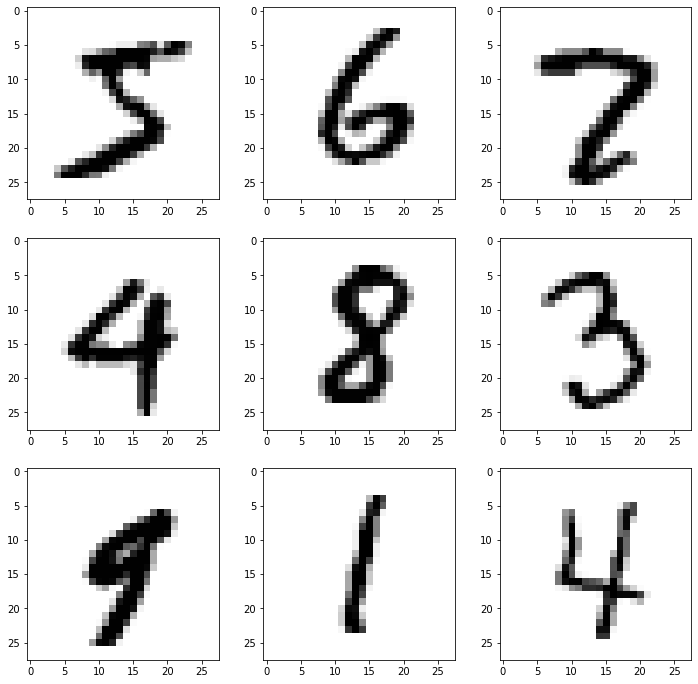

In [4]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

imagem media

In [5]:
X_train.shape

(60000, 784)

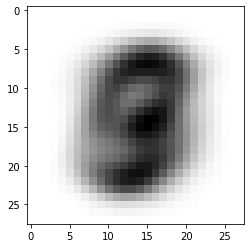

In [6]:
x0 = X_train.mean(axis=0)
plt.imshow(x0.reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Removendo a média

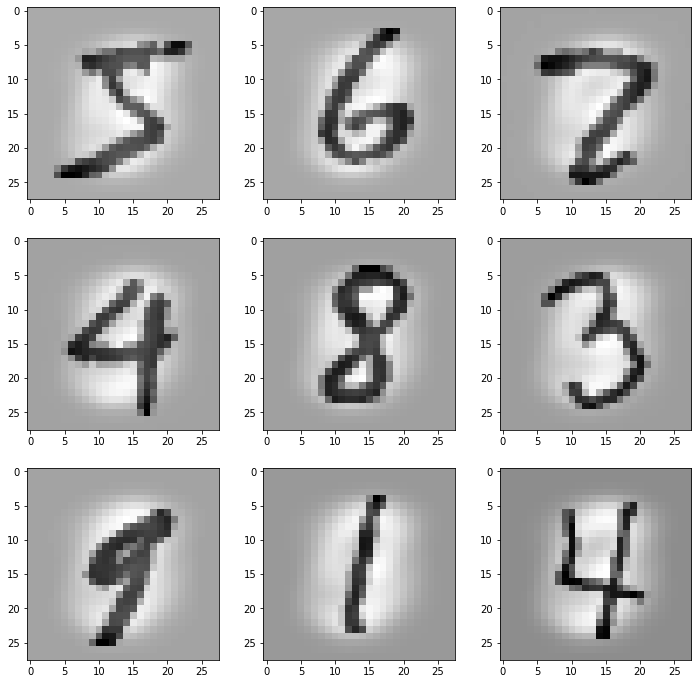

In [7]:
X_train_residual = X_train.copy()
for i in range(X_train_residual.shape[0]):
    X_train_residual[i,:] -= x0

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_residual[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Usando SVD para obter as componentes principais:

In [8]:
X_train_residual.shape

(60000, 784)

In [9]:
U, s, Vt = np.linalg.svd(X_train_residual[::10, :])

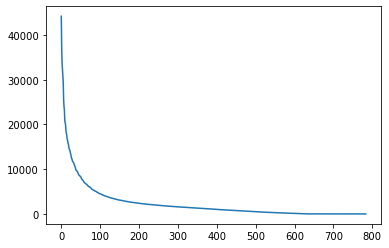

In [10]:
plt.plot(s)

In [11]:
s.shape

(784,)

In [12]:
print(s[:10])

[44195.3334486  37164.40884423 33755.96645617 32377.34228749
 31009.81990413 29415.11965179 25639.64571737 24010.83792817
 23139.20957886 20868.99833718]


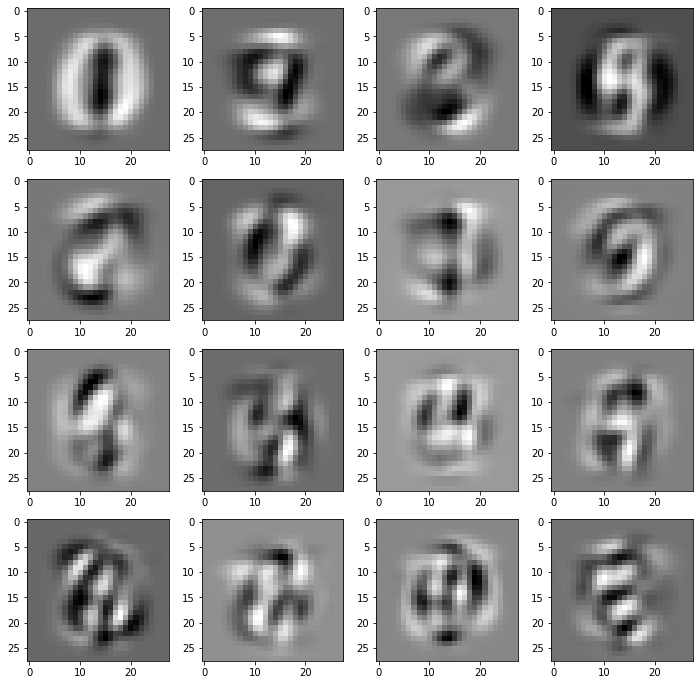

In [13]:
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    aux = Vt[i,:]/max(Vt[i,:])
    plt.imshow(aux.reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

In [13]:
v = Vt[0,:]
v.dot(v)

0.9999999999999984

Removendo a média e a primeira componente:

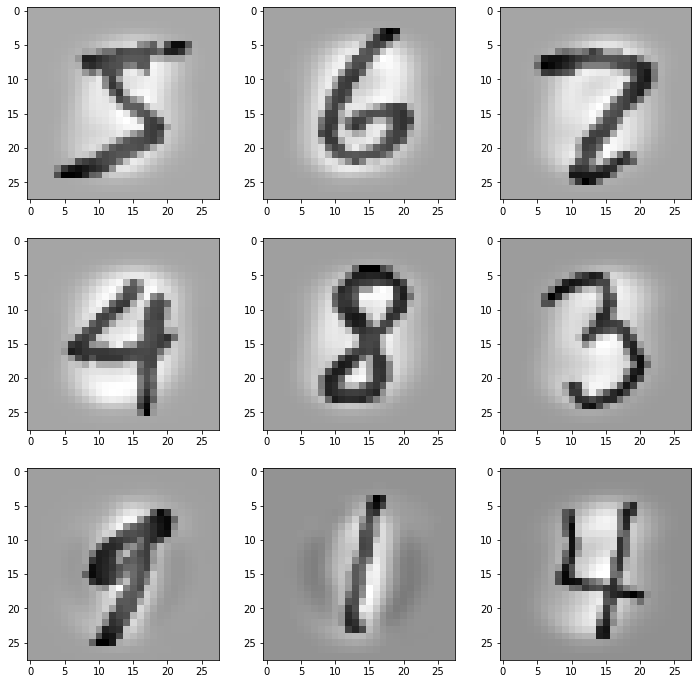

In [14]:
v0 = Vt[0, :]

X_train_residual = X_train.copy()

for i in range(X_train_residual.shape[0]):
    X_train_residual[i, :] -= x0
    X_train_residual[i, :] -= X_train_residual[i, :].dot(v0)*v0
    
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_residual[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Removendo a média, a primeira componente, e a segunda componente:

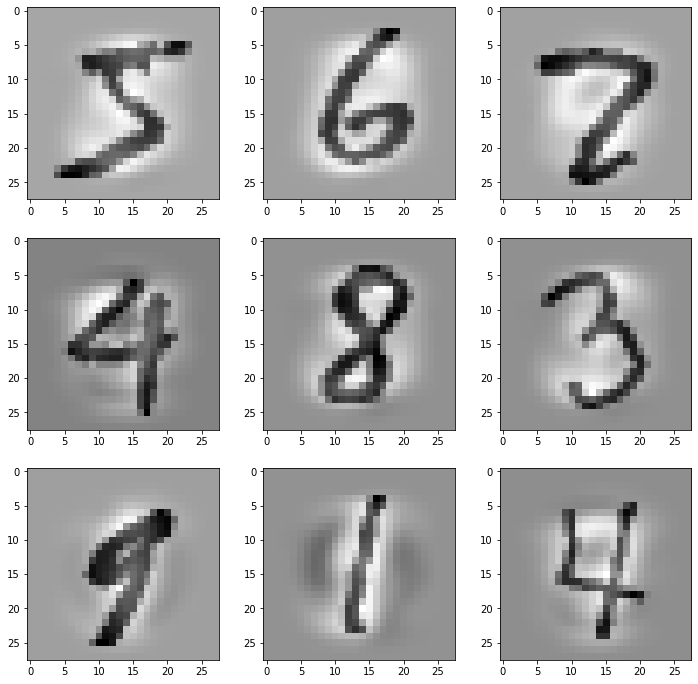

In [15]:
v1 = Vt[1, :]

X_train_residual = X_train.copy()

for i in range(X_train_residual.shape[0]):
    X_train_residual[i, :] -= x0
    X_train_residual[i, :] -= X_train_residual[i, :].dot(v0)*v0
    X_train_residual[i, :] -= X_train_residual[i, :].dot(v1)*v1
    
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_residual[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Removendo a média e as 150 primeiras componentes (pode demorar alguns minutos):

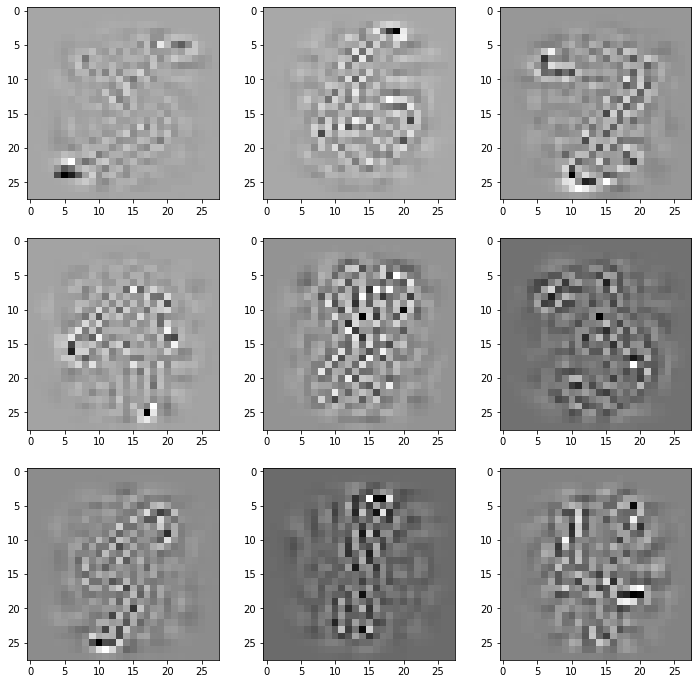

Wall time: 1min 27s


In [16]:
%%time
X_train_residual = X_train.copy()
num_components = 150

for i in range(X_train_residual.shape[0]):
    X_train_residual[i, :] -= x0
    for j in range(num_components):
        v = Vt[j, :]
        X_train_residual[i, :] -= X_train_residual[i, :].dot(v)*v
    
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_residual[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

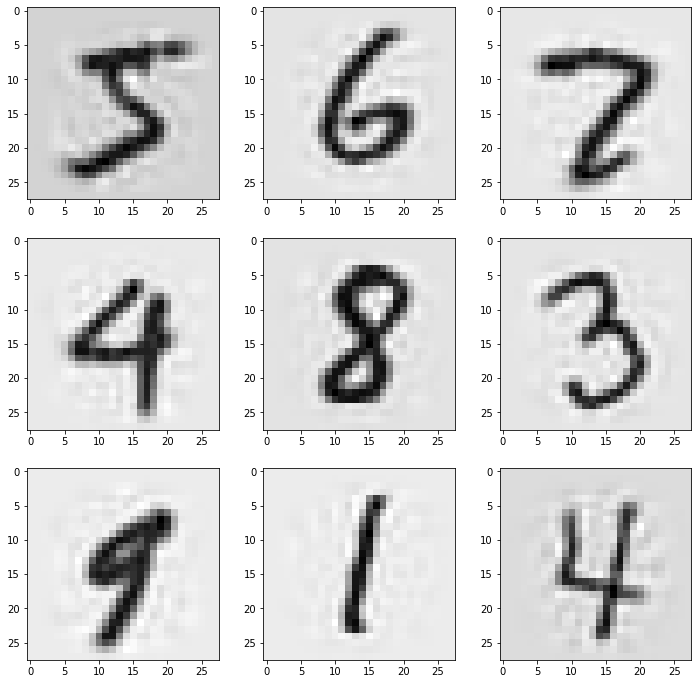

In [19]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow((X_train - X_train_residual)[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

**Atividade**

Exercício 9 do livro texto